In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_test.shape)
print(x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
(10000, 28, 28)
(60000, 28, 28)


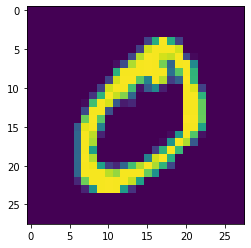

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
plt.imshow(x_train[1], interpolation='nearest')
plt.show()

In [13]:
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_train_flat = x_train_flat.astype(float)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
x_test_flat = x_test_flat.astype(float)
mean_image = np.mean(x_train_flat, axis=0)
x_train_flat -= mean_image
x_test_flat -= mean_image
print ("train_set_x_flatten shape: " + str(x_train_flat.shape))
print ("test_set_x_flatten shape: " + str(x_test_flat.shape))

train_set_x_flatten shape: (60000, 784)
test_set_x_flatten shape: (10000, 784)


In [0]:
dimR = 784
dimC = 10
W = np.zeros((dimR,dimC))
lamda = 1
max_iter = 1000000

In [0]:
def block_soft_threshold(W,mu):
    for i in range(0,W.shape[0]):
      l2norm = np.linalg.norm(W[i][:])
      if l2norm == 0:
        continue;
      W[i][:] = np.multiply(W[i][:]/ l2norm,np.maximum(l2norm - mu, 0))
    return W

In [0]:
def svm_naive(W, X, y, reg,i):
    """
    This function implementation has been taken from the cs231n course of Stanford
    The algorithm has been elaborated at the following link
    http://cs231n.github.io/optimization-1/
    """
    dW = np.zeros(W.shape) # initialize the gradient as zero

    # Compute the loss and the gradient.
    num_classes = W.shape[1]
    num_train = X.shape[0]
    scores = X[i].dot(W) 
    correct_class_score = scores[y[i]]

    # Iterate over incorrect classes.
    for j in range(num_classes):
        if j == y[i]:
            continue
        # If margin is met, accumulate loss for the jth example 
        # and calculate associated gradient. 
        margin = scores[j] - correct_class_score + 1 
        if margin > 0:
            dW[:,j] += X[i,:]  
            dW[:,y[i]] -= X[i,:] 
    return dW

In [0]:
def error_calculate(W):
    error = 0
    for i in range(0, len(x_test_flat)):
        x_i = x_test_flat[i]
        max_val = -1
        max_i = 10
        for digit in range(0,10):
            res = np.dot(x_i.T, W[:,digit])
            if(res>max_val):
                max_val = res
                max_i = digit
        if(max_i!=y_test[i]):
            error+=1
    return 100*error/len(x_test_flat)

In [0]:
y_train = np.array(y_train)
y_train_flat = y_train.reshape(y_train.shape[0], -1)
data = [[] for y in range(10)]
for index in range(0, len(y_train_flat)):
  val = y_train_flat[index][0]
  data[val].append(index)

In [15]:
import random
W = np.zeros((dimR,dimC))
dW = np.zeros(W.shape)
error_PG = []

for t in range(1, max_iter+1):
    for i in range(0,10):
      rand_index = data[i][random.randrange(len(data[i]))]
      dW = svm_naive(W,x_train_flat, y_train, 1,rand_index)
      W = W - (1/t)* dW
    W = block_soft_threshold(W,lamda/t)
    if (t%1000 == 0 or t == 1):
            error = error_calculate(W)
            error_PG.append(error)
    if (t%100000 == 0 or t == 1):
            print('iter= {},\errorRate= {:3f}'.format(t,error))


iter= 1,\errorRate= 63.090000
iter= 100000,\errorRate= 21.890000
iter= 200000,\errorRate= 21.370000
iter= 300000,\errorRate= 21.050000
iter= 400000,\errorRate= 20.780000
iter= 500000,\errorRate= 20.620000
iter= 600000,\errorRate= 20.490000
iter= 700000,\errorRate= 20.340000
iter= 800000,\errorRate= 20.210000
iter= 900000,\errorRate= 20.100000
iter= 1000000,\errorRate= 19.970000


Text(0, 0.5, 'Prediction accuracy percentage')

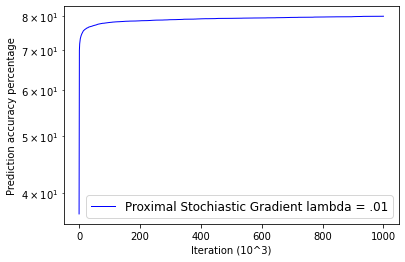

In [20]:
t = np.arange(0, 1001)
plt.semilogy(t, 100-np.array(error_PG), 'b', linewidth = 1, label = 'Proximal Stochiastic Gradient lambda = .01')
plt.legend(prop={'size':12})
plt.xlabel('Iteration (10^3)')
plt.ylabel('Prediction accuracy percentage')

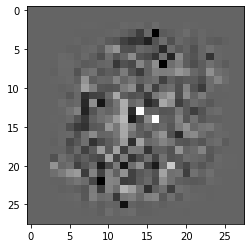

In [21]:
weight_sum = np.sum(W,axis = 1)/10
image = np.reshape(weight_sum,(28,28))
plt.imshow(image,cmap = 'gray', interpolation= 'nearest')
plt.show()

In [22]:
count_zeros = 0;
for i in weight_sum:
  if i==0:
    count_zeros += 1
print ("Total No of features being discarded: ", count_zeros)

Total No of features being discarded:  179
